In [108]:
import os 
if 'notebooks' in os.getcwd():
    os.chdir("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [109]:
prices = pd.read_csv(
    "data/round3/prices_round_3_day_0.csv",
    sep = ';'
)

In [110]:
prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,DIVING_GEAR,99999.0,6.0,99998.0,19.0,NaN,NaN,100001.0,6.0,100002.0,19.0,NaN,NaN,100000.0,0.0
1,0,0,PEARLS,9998.0,1.0,9995.0,30.0,NaN,NaN,10005.0,30.0,NaN,NaN,NaN,NaN,10001.5,0.0
2,0,0,COCONUTS,8113.0,205.0,NaN,NaN,NaN,NaN,8116.0,205.0,NaN,NaN,NaN,NaN,8114.5,0.0
3,0,0,BERRIES,3997.0,19.0,3996.0,58.0,NaN,NaN,4003.0,19.0,4005.0,58.0,NaN,NaN,4000.0,0.0
4,0,0,BANANAS,4893.0,1.0,4892.0,30.0,NaN,NaN,4899.0,30.0,NaN,NaN,NaN,NaN,4896.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,999900,BERRIES,3917.0,16.0,3916.0,41.0,NaN,NaN,3924.0,57.0,NaN,NaN,NaN,NaN,3920.5,243300.0
69996,0,999900,PEARLS,9996.0,2.0,9995.0,21.0,NaN,NaN,10004.0,2.0,10005.0,21.0,NaN,NaN,10000.0,-408.0
69997,0,999900,BANANAS,4870.0,23.0,NaN,NaN,NaN,NaN,4876.0,2.0,4877.0,21.0,NaN,NaN,4873.0,121460.0
69998,0,999900,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3047.0,0.0


In [111]:
diving_gear_prices = prices\
    .query("product == 'DIVING_GEAR'")\
    .set_index("timestamp")
dolphin_sightins = prices\
    .query("product == 'DOLPHIN_SIGHTINGS'")\
    .set_index("timestamp")
berries_prices = prices\
    .query("product == 'BERRIES'")\
    .set_index("timestamp")

# Hypothesis 

* Berries are seasonal - their price drops after sometime
* Dolphin sightins is a feature to diving gear prices

# Dolphin sightins -> Diving gear

In [112]:
dolphin_sightins.mid_price

timestamp
0         3000.0
100       3000.0
200       2999.0
300       2999.0
400       2999.0
           ...  
999500    3046.0
999600    3046.0
999700    3047.0
999800    3047.0
999900    3047.0
Name: mid_price, Length: 10000, dtype: float64

In [113]:
diving_gear_prices.mid_price

timestamp
0         100000.0
100       100000.0
200       100002.5
300       100000.0
400        99994.5
            ...   
999500     98899.0
999600     98909.5
999700     98906.0
999800     98907.5
999900     98915.0
Name: mid_price, Length: 10000, dtype: float64

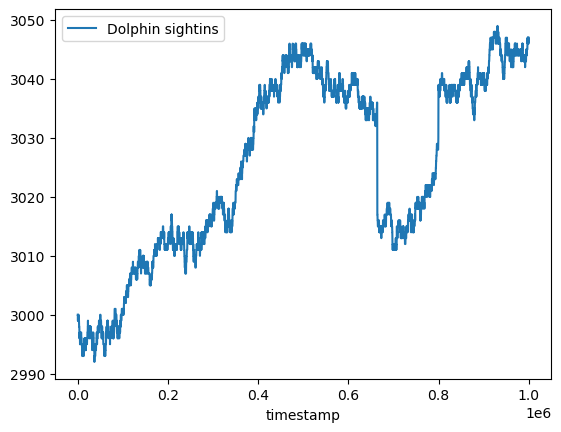

In [114]:
dolphin_sightins\
    .mid_price\
    .plot(label = "Dolphin sightins")

plt.legend()

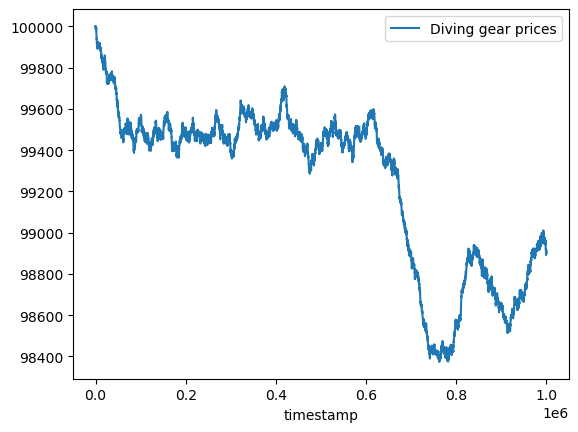

In [115]:
diving_gear_prices\
    .mid_price\
    .plot(label = "Diving gear prices")

plt.legend()

In [116]:
diving_gear_prices\
    .mid_price\
    .corr(
        dolphin_sightins.mid_price
    )

-0.3405697738264345

In [117]:
model = LinearRegression(fit_intercept=True)
model.fit(dolphin_sightins[["mid_price"]], diving_gear_prices.mid_price)

LinearRegression()

In [118]:
model.coef_

array([-8.49163078])

In [119]:
model.intercept_

124930.63810402852

In [120]:
pred = model.predict(dolphin_sightins[["mid_price"]])

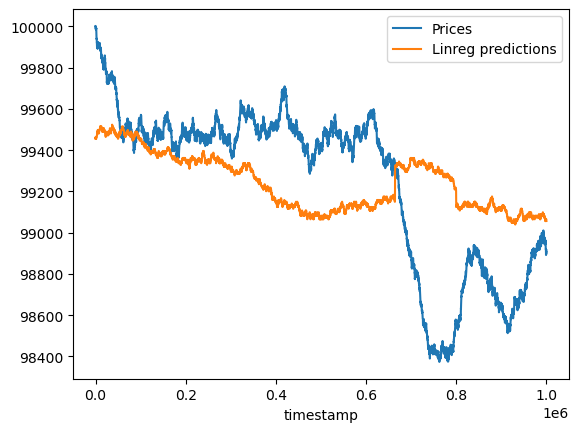

In [121]:
diving_gear_prices.mid_price.plot(label = "Prices")
pd.Series(pred, index= diving_gear_prices.index)\
    .plot(label = "Linreg predictions")

plt.legend()

In [122]:
avg_dolphin_sightins = dolphin_sightins\
    .mid_price\
    .rolling(200)\
    .mean()

std_dolphin_sightins = dolphin_sightins\
    .mid_price\
    .rolling(200)\
    .std()

z_score_dolphin = (dolphin_sightins.mid_price - avg_dolphin_sightins)/std_dolphin_sightins

In [123]:
avg_diving_gear_price = diving_gear_prices\
    .mid_price\
    .rolling(200)\
    .mean()

std_diving_gear_price = diving_gear_prices\
    .mid_price\
    .rolling(200)\
    .std()

z_score_diving_gear = (diving_gear_prices.mid_price - avg_diving_gear_price)/std_diving_gear_price

In [124]:
buy = z_score_dolphin < -2
sell = z_score_dolphin > 2

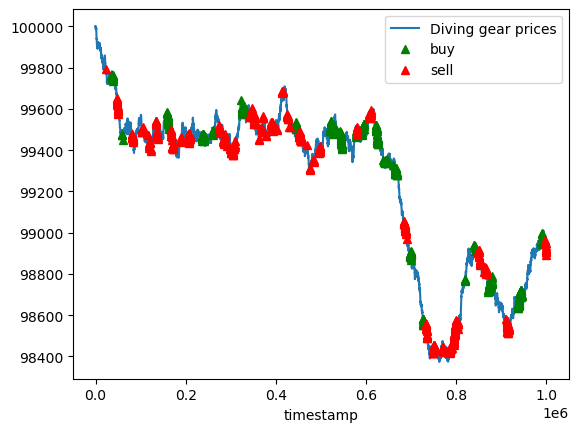

In [125]:
diving_gear_prices.mid_price.plot(label = "Diving gear prices")

diving_gear_prices[buy]\
    .mid_price\
    .plot(
    marker ='^', 
    color ='green', 
    linestyle= 'None',
    label = 'buy'
)

diving_gear_prices[sell]\
    .mid_price\
    .plot(
    marker ='^', 
    color ='red', 
    linestyle= 'None',
    label = 'sell'
)

plt.legend()


## Creating another features

In [126]:
diving_gear_prices

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,0,DIVING_GEAR,99999.0,6.0,99998.0,19.0,NaN,NaN,100001.0,6.0,100002.0,19.0,NaN,NaN,100000.0,0.000000
100,0,DIVING_GEAR,99999.0,5.0,99998.0,12.0,NaN,NaN,100001.0,5.0,100002.0,12.0,NaN,NaN,100000.0,0.000000
200,0,DIVING_GEAR,100002.0,2.0,100001.0,10.0,100000.0,14.0,100003.0,10.0,100004.0,14.0,NaN,NaN,100002.5,-2.875000
300,0,DIVING_GEAR,99999.0,9.0,99998.0,11.0,NaN,NaN,100001.0,9.0,100002.0,11.0,NaN,NaN,100000.0,-1.140625
400,0,DIVING_GEAR,99993.0,19.0,NaN,NaN,NaN,NaN,99996.0,19.0,NaN,NaN,NaN,NaN,99994.5,4.484375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999500,0,DIVING_GEAR,98898.0,7.0,98897.0,12.0,NaN,NaN,98900.0,7.0,98901.0,12.0,NaN,NaN,98899.0,495968.000000
999600,0,DIVING_GEAR,98908.0,18.0,NaN,NaN,NaN,NaN,98911.0,18.0,NaN,NaN,NaN,NaN,98909.5,480960.000000
999700,0,DIVING_GEAR,98905.0,9.0,98904.0,11.0,NaN,NaN,98907.0,9.0,98908.0,11.0,NaN,NaN,98906.0,486192.000000


In [127]:
target = diving_gear_prices\
    .mid_price\
    .shift(-20)\
    .subtract(diving_gear_prices.mid_price)\
    .divide(diving_gear_prices.mid_price)

In [128]:
# momentum = 

# Berries

<AxesSubplot:xlabel='timestamp'>

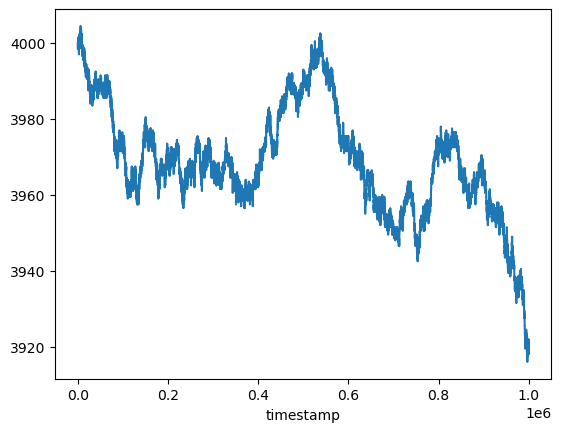

In [129]:
berries_prices.mid_price.plot()